![emoji](emoji-analysis.jpeg)

## Explore the Twitter Data

Run ALL the stats!

In [1]:
#boiler
import IPython
from IPython.display import IFrame, Image, display, YouTubeVideo
import pandas as pd
import numpy as np
#more boilerplat dawg
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

import pysal as ps
import pysal.spatial_dynamics.interaction as interaction
from matplotlib.patches import Ellipse, Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import interact, interactive, fixed

from shapely.geometry import Point
import geopandas

In [2]:
data = "/lecture12/tweet_subset.csv"
data = pd.read_csv(data,header=0)
data.head()

,Unnamed: 0,X,Y,polarity,lang,possibly_sensitive,favorited,truncated,geo_enabled,retweeted,...,retweet_count,followers_count,source,text,id_str,id,favorite_count,user,created_at,subjectivity
0,0,-73.995707,40.915150,0.350000,en,0,0,0,1,0,...,0,569,"<a href=""http://twitter.com/download/iphone"" r...",@ChiefKeef i love you so much,537689070819098625,537689070819098625,0,"{ ""description"": ""i was born in the 90s fuck t...",Wed Nov 26 19:27:18 +0000 2014,0.400000
1,1,-73.867459,40.694756,-0.121212,en,0,0,0,1,0,...,0,358,"<a href=""http://twitter.com/download/iphone"" r...",But deadass queens is the MOST BORING PLACE TO...,537689074753363968,537689074753363968,0,"{ ""description"": ""UAlbany '17 Queens| Brooklyn...",Wed Nov 26 19:27:19 +0000 2014,0.666667
2,2,-77.580194,43.148091,0.500000,en,0,0,0,1,0,...,0,1039,"<a href=""http://twitter.com/download/android"" ...",.@RonconesItalian Sure.,537689077295091712,537689077295091712,0,"{ ""description"": ""Twitter Conversationalist|SJ...",Wed Nov 26 19:27:20 +0000 2014,0.888889
3,3,-73.334258,40.727622,0.200000,en,0,0,0,1,0,...,0,533,"<a href=""http://twitter.com/download/iphone"" r...",@BUDAPESTANSEL 😭😭😭😍😩 omg thanks girl hope you ...,537689080981889025,537689080981889025,0,"{ ""description"": null, ""lang"": ""en"", ""profile_...",Wed Nov 26 19:27:21 +0000 2014,0.200000
4,4,-73.903500,40.746400,0.317677,en,0,0,0,1,0,...,0,186,"<a href=""http://www.twitter.com"" rel=""nofollow...",We're so lucky! @EverythingNYC: Holiday Window...,537689081715884032,537689081715884032,0,"{ ""description"": ""Loving Chilean in NY, caring...",Wed Nov 26 19:27:21 +0000 2014,0.662626


In [3]:
X = data['X'] #h1
Y = data['Y'] #h2
fol = data['followers_count'] #h3
time = data['created_at'] #h4-this is redfined below as military time
pol = data['polarity'] #h5
subj = data ['subjectivity'] #6

In [4]:
time.head()

0    Wed Nov 26 19:27:18 +0000 2014
1    Wed Nov 26 19:27:19 +0000 2014
2    Wed Nov 26 19:27:20 +0000 2014
3    Wed Nov 26 19:27:21 +0000 2014
4    Wed Nov 26 19:27:21 +0000 2014
Name: created_at, dtype: object

In [5]:
tm = pd.DataFrame(time)
tm.head()

,created_at
0,Wed Nov 26 19:27:18 +0000 2014
1,Wed Nov 26 19:27:19 +0000 2014
2,Wed Nov 26 19:27:20 +0000 2014
3,Wed Nov 26 19:27:21 +0000 2014
4,Wed Nov 26 19:27:21 +0000 2014


In [6]:
tm = pd.DataFrame(tm.created_at.str.split(' ',0).tolist(),
                  columns = ['Weekday','Month','Day','Time','MS','Year'])

In [7]:
tm.head()

,Weekday,Month,Day,Time,MS,Year
0,Wed,Nov,26,19:27:18,+0000,2014
1,Wed,Nov,26,19:27:19,+0000,2014
2,Wed,Nov,26,19:27:20,+0000,2014
3,Wed,Nov,26,19:27:21,+0000,2014
4,Wed,Nov,26,19:27:21,+0000,2014


In [8]:
time = tm['Time'] #military time
time.head()

0    19:27:18
1    19:27:19
2    19:27:20
3    19:27:21
4    19:27:21
Name: Time, dtype: object

## Map the Twitter Data

[Code abbreviated from Bill Mills](https://github.com/BillMills/python-mapping)

In [9]:
from mpl_toolkits.basemap import Basemap
fname = "/lecture12/tweet_subset.csv"
data=pd.read_csv(fname)
lons = np.array(data['X'])
lats = np.array(data['Y'])

In [10]:
xs=map(lons, lats)
fig = plt.figure(figsize=(30,30))
map = Basemap(projection='merc', lat_0=40.9855, lon_0=-74.1,
              resolution = 'h', area_thresh = 0.1,
              llcrnrlon=-80, llcrnrlat=39,
              urcrnrlon=-70, urcrnrlat=45)

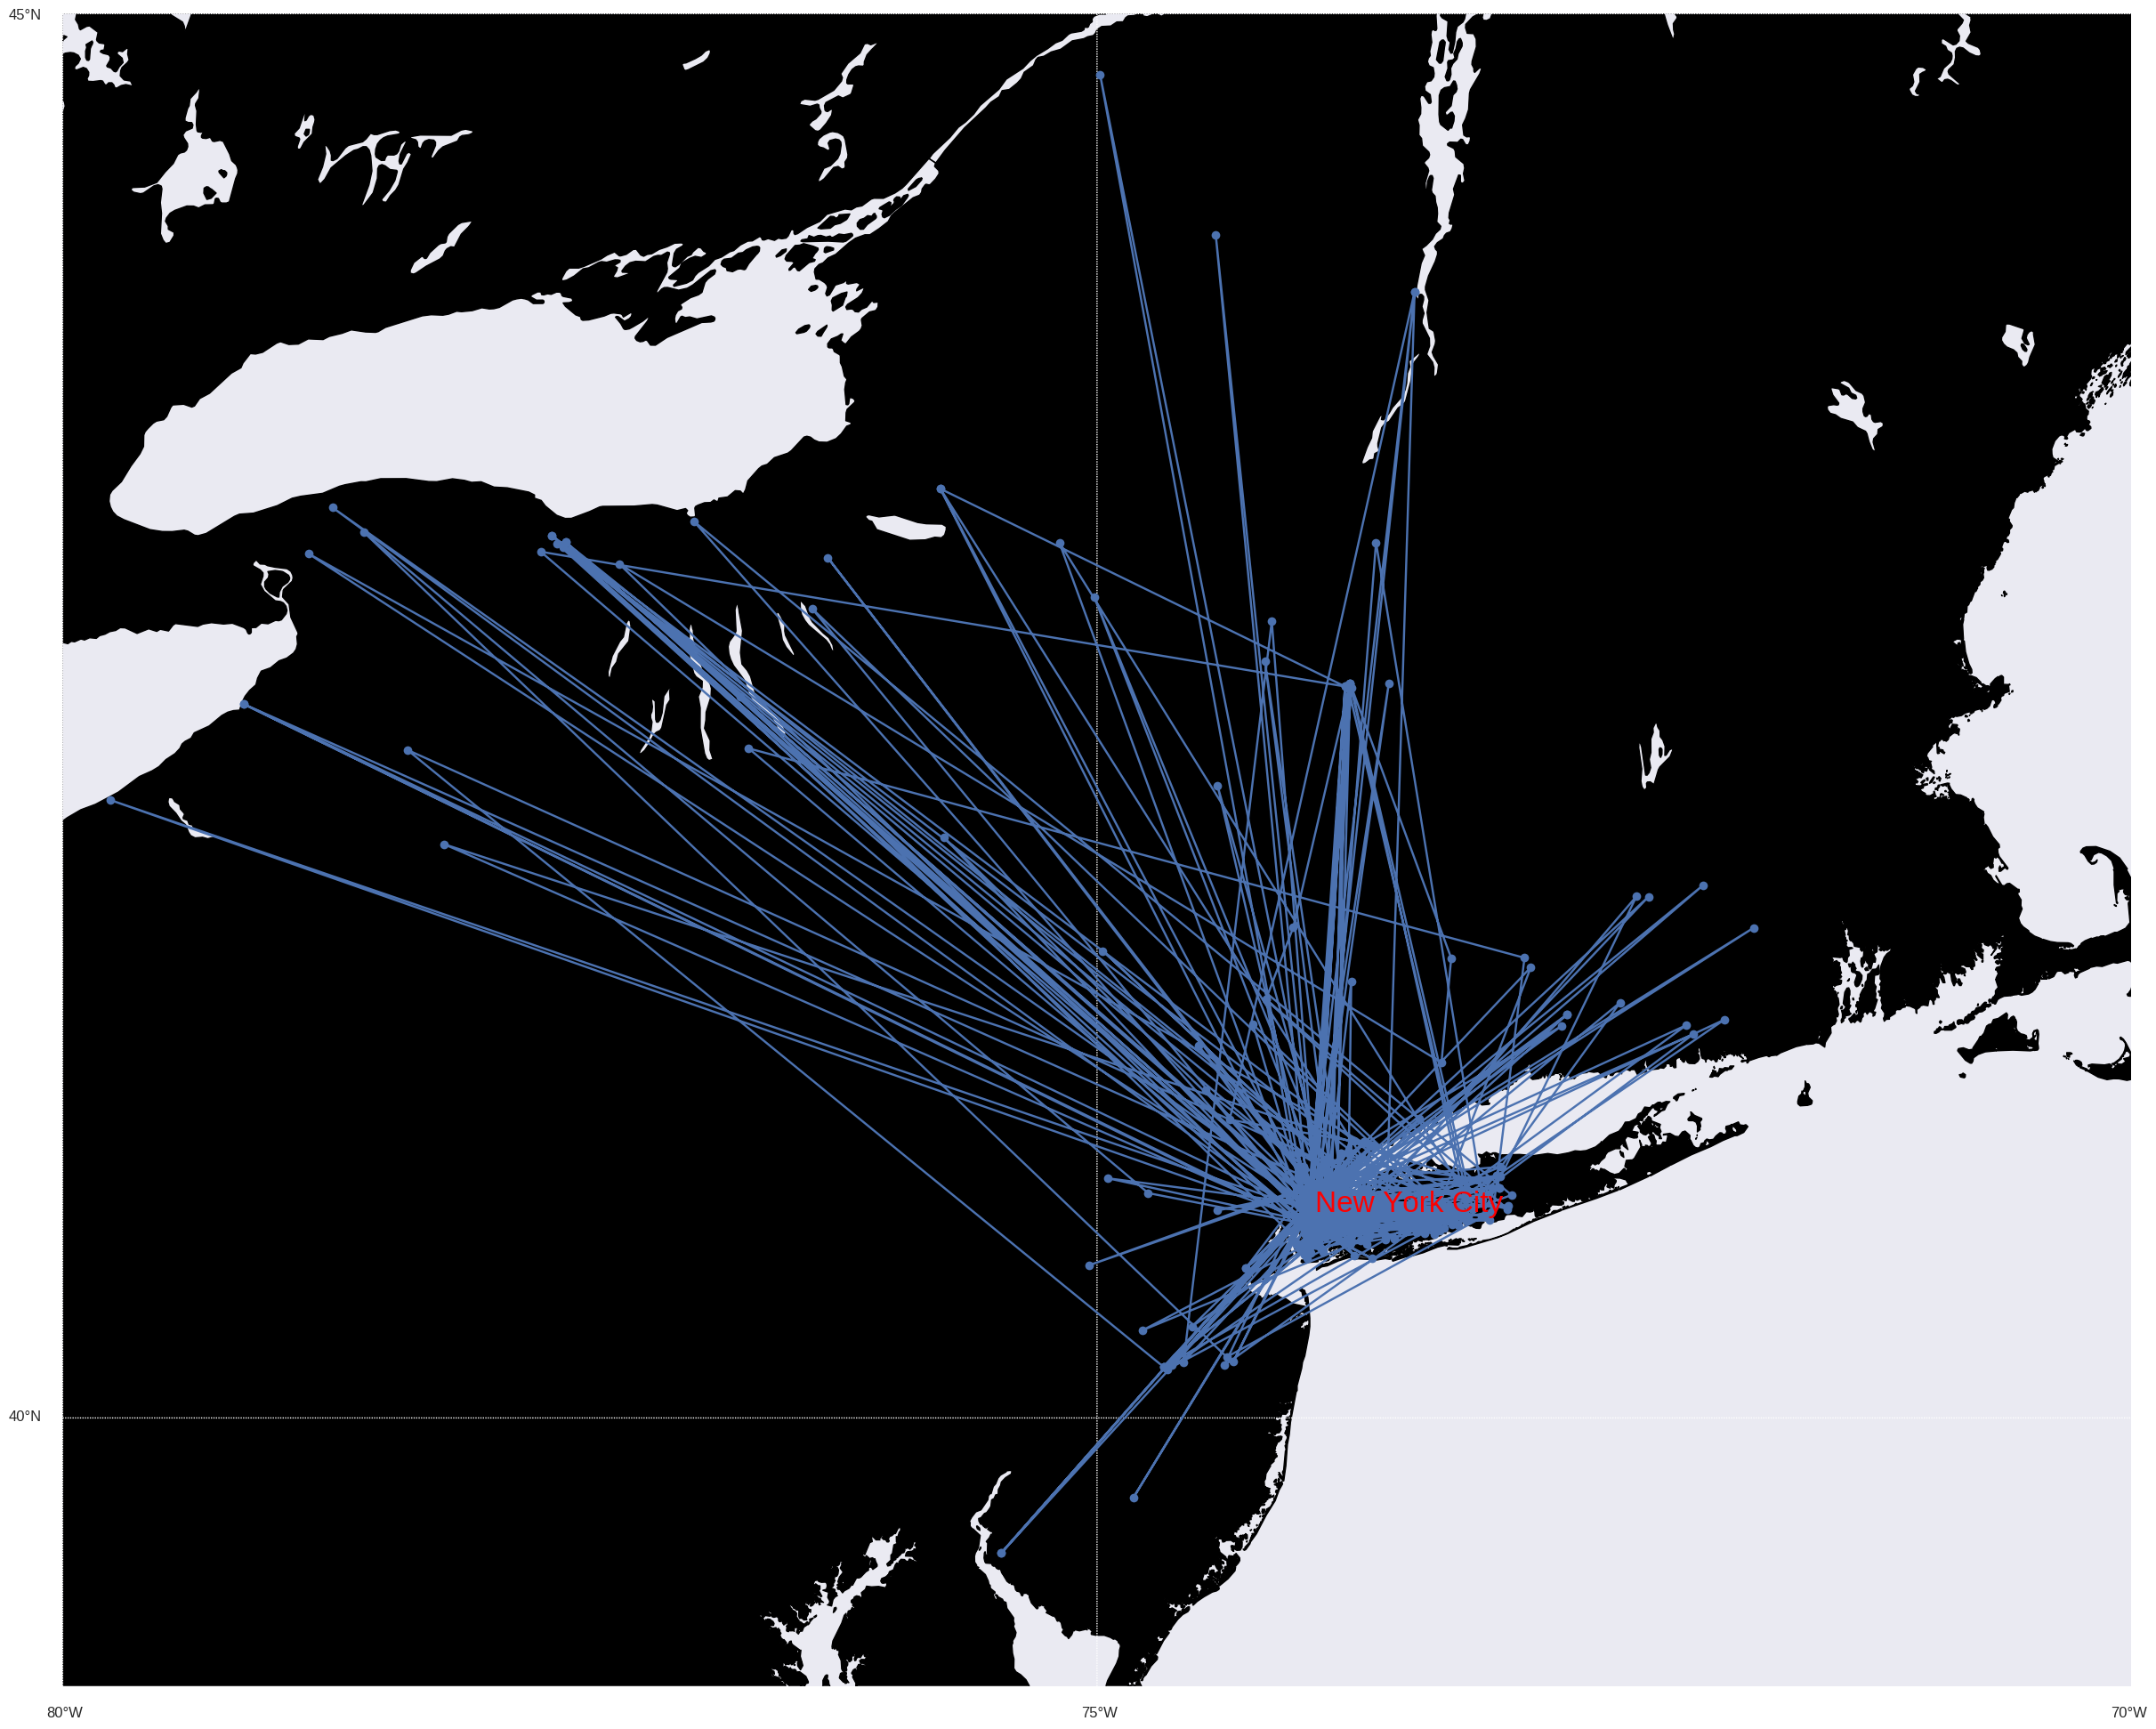

In [11]:
map.drawcoastlines()
map.fillcontinents(color='Black')
#map.drawrivers(color='b',linewidth=1)

ny_lon = -74.0059
ny_lat = 40.7128
x,y = map(ny_lon, ny_lat)
map.plot(x, y, 'r*', markersize=16)
plt.annotate('New York City',xy=(x,y),xytext=(10,10),textcoords='offset points',fontsize=24,color='Red')

map.drawmeridians([-70, -75, -80], labels=[1,0,0,1],color='White')
map.drawparallels([40, 45, 50],labels=[1,0,0,1],color='White')

xs,ys=map(lons, lats)
map.plot(xs,ys,'o-')
plt.show()

## Linked carsonfarmer streamhist

The one-pass histogram as described by Ben-Haim's [Streaming Parallel Decision Tree](http://jmlr.org/papers/volume11/ben-haim10a/ben-haim10a.pdf). So I ended up installing [this package](https://github.com/carsonfarmer/streamhist) through both pip and git clone and trying to edit the git clone version while my path was set to the pip version. Many hours!

Histograms can be helpful in describing the underlying variable by giving a general sense of the density of the data. The one-pass histogram and streaming histogram implementation is optimized to be useful for any reasonable range of data even while the distribution changes over time.

Since these histograms can be built independently and merged, this is useful for parallel and distributed algorithms. Streamhist is a Python based combination of ideas from [BigML's Java implementation](https://github.com/bigmlcom/histogram) and [VividCortex's gohistogram](https://github.com/VividCortex/gohistogram). 

The base programming maths behind this are found on [John D. Cook's blog](http://www.johndcook.com/blog/running_regression/) about C++ and other concepts.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")  # Makes for nicer looking plots

try:
    from functools import reduce
except ImportError:
    pass

from streamhist import StreamHist
import sklearn as sk
from sklearn import preprocessing

A Spatially-local Dynamic Histogram was created for us in lecture using correlated random Gaussian variables (0.83, -0.83, and .3). The Add C algorithm was included with geographical weighting, a histogram, and a regression to arrive at local spatial regressions or correlation estimates of 0.2497, 0.8129, and -0.8101 with a global correlation of -0.0024 (although the graphs weren't included to really know what was happening). Obviously IP proxies could be used to spoof this information skewing the actual location of the tweets, resulting in an inherent bias.

### How should we scale?

Our dataset was obtained over the 2014 Thanksgiving weekend in NYC using the Twitter Streaming API and contains 263,594 instances. A 500 instance subset of the data will be tested as a sketch of the data to give a generalization of our information.

### One-pass stream histogram: Polarity

The task was to perform emoji-analysis (South Park &copy;) on the data-set's polarity column. This column analyzes the sentiment of each tweet using a text classifying algorithm, which is a black box to me since I'm unfamiliar with the classifier's parameters. The sentiment is specified on a range of -1 to 1 where -1 is the most negative, 0 is neutral, and 1 is the most positive. 

There are a few such Twitter apps out there ([like this one](http://www.sentiment140.com/)) and blogs ([like this one](https://www.csc2.ncsu.edu/faculty/healey/tweet_viz/)) that visualize and explore the psychology behind trying the classify human emotions. Since I don't really know how the sketch's polarity algorithm classifies each tweet, it's hard to say how accurate this is. Specific questions include:

* How well would this recognize sarcasm?
* How well would it recognize a double negative?
* How accurate is it at finding trolls, word pom, and bots?

In [10]:
pol

0      0.350000
1     -0.121212
2      0.500000
3      0.200000
4      0.317677
5     -0.625000
6      0.000000
7      1.000000
8      0.049107
9      0.375000
10     0.000000
11    -0.800000
12     0.000000
13     0.000000
14     0.350000
15     0.600000
16     0.000000
17     0.000000
18     0.000000
19     0.750000
20    -0.100000
21     0.100000
22    -0.100000
23     0.250000
24     0.000000
25     0.000000
26     0.066667
27     0.000000
28    -0.625000
29     0.383333
         ...   
470    0.500000
471    0.000000
472    0.050000
473   -0.300000
474    0.000000
475    0.000000
476    0.000000
477    0.000000
478    1.000000
479    0.000000
480    0.468182
481    0.000000
482    0.700000
483   -0.156250
484    0.562500
485   -0.800000
486   -0.312500
487    0.100000
488    1.000000
489    0.600000
490    0.000000
491   -0.175000
492    0.000000
493    0.000000
494    0.000000
495    0.000000
496   -0.250000
497    0.000000
498    0.390625
499    0.000000
Name: polarity, dtype: f

## Preprocessing data

Just by looking at the brief column, it appears as though there are many instances of 0 or neutral tweets. Since it can be inferred from human nature that most tweets contain some sort of attitude, it is difficult to assume that so many tweets are automatically classified as neutral. Text classifiers work better with more data to analyze, however tweets only contain 140 characters and present some hurdles. Additional questions can thus be raised about the black-box algorithm: 

* Are there so many neutral tweets because the data itself lacked any emojicons to analyze? 

* Did the algorithm actually filter out tweets that it saw as sarcastic/bots and classify them as neutral?

* Why are we trying to express human emotions in 140 characters/emojis or less in the first place?

A fair amount of preprocessing of this data using sentiment dictionaries is needed to generalize the feelings of people and is explored in depth in a variety of papers. The math behind it are also examined [in this one](http://www.cs.columbia.edu/~julia/papers/Agarwaletal11.pdf). The complexity involved in classifying text might mean that our polarity is based wholly on the presence of emojis and discards the remaining tweets into the 0 or neutral tweet classification. This seems to be a limiting factor of the linear algorithm used in this study.

![MJT](MJT.png)

### Standardization, or mean removal and variance scaling

The polarity of our data is already really well scaled from -1 to 1 but it's interesting to look at other scaling techniques needed for different machine learning implementations.

Standardizing data to allow it to behave well in many machine learning estimators usually requires the data to be scaled to look like standard normally distributed Gaussian data with zero mean and unit variance.

The [preprocessing module from scikit learn](http://scikit-learn.org/stable/modules/preprocessing.html) is explored to better understand how to best normalize our twitter data.

In [11]:
scale = preprocessing.scale(pol)
scale

array([ 0.85611608, -0.59405369,  1.31774569,  0.39448648,  0.75664034,
       -2.14447635, -0.22101966,  2.85651104, -0.06989092,  0.93305435,
       -0.22101966, -2.68304422, -0.22101966, -0.22101966,  0.85611608,
        1.62549876, -0.22101966, -0.22101966, -0.22101966,  2.08712837,
       -0.52877273,  0.08673341, -0.52877273,  0.54836301, -0.22101966,
       -0.22101966, -0.01585095, -0.22101966, -2.14447635,  0.95870044,
       -1.75978501,  2.08712837, -0.22101966, -0.22101966, -0.22101966,
       -0.22101966, -0.22101966, -0.3748962 ,  0.54836301, -0.22101966,
       -1.45203194, -0.22101966,  0.16367168, -0.06714313,  2.2410049 ,
       -0.22101966, -0.22101966,  0.54836301,  1.93325183, -0.22101966,
       -0.22101966, -0.22101966, -1.75978501, -0.22101966, -0.22101966,
       -0.8365258 , -0.22101966, -0.22101966,  1.93325183, -0.22101966,
        0.32853939,  0.12869974, -1.45203194, -0.22101966, -0.22101966,
       -0.22101966, -0.22101966, -0.68264927, -0.22101966, -0.39

In [12]:
scale.mean(axis=0)

-1.9539925233402754e-17

In [13]:
scale.std(axis=0)

1.0000000000000002

In [14]:
scale2 = preprocessing.StandardScaler().fit(pol)
scale2

/home/franciscodeaqui/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scale2 = pol.reshape(-1, 1)
scale2

array([[ 0.35      ],
       [-0.12121212],
       [ 0.5       ],
       [ 0.2       ],
       [ 0.31767677],
       [-0.625     ],
       [ 0.        ],
       [ 1.        ],
       [ 0.04910714],
       [ 0.375     ],
       [ 0.        ],
       [-0.8       ],
       [ 0.        ],
       [ 0.        ],
       [ 0.35      ],
       [ 0.6       ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.75      ],
       [-0.1       ],
       [ 0.1       ],
       [-0.1       ],
       [ 0.25      ],
       [ 0.        ],
       [ 0.        ],
       [ 0.06666667],
       [ 0.        ],
       [-0.625     ],
       [ 0.38333333],
       [-0.5       ],
       [ 0.75      ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.05      ],
       [ 0.25      ],
       [ 0.        ],
       [-0.4       ],
       [ 0.        ],
       [ 0.125     ],
       [ 0.05      ],
       [ 0.8       ],
       [ 0

In [16]:
scale3 = preprocessing.StandardScaler().fit(scale2)
scale3

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scale3.mean_

array([ 0.07181721])

In [18]:
scale3.scale_

array([ 0.32493583])

In [19]:
scale3.transform(scale2)

array([[ 0.85611608],
       [-0.59405369],
       [ 1.31774569],
       [ 0.39448648],
       [ 0.75664034],
       [-2.14447635],
       [-0.22101966],
       [ 2.85651104],
       [-0.06989092],
       [ 0.93305435],
       [-0.22101966],
       [-2.68304422],
       [-0.22101966],
       [-0.22101966],
       [ 0.85611608],
       [ 1.62549876],
       [-0.22101966],
       [-0.22101966],
       [-0.22101966],
       [ 2.08712837],
       [-0.52877273],
       [ 0.08673341],
       [-0.52877273],
       [ 0.54836301],
       [-0.22101966],
       [-0.22101966],
       [-0.01585095],
       [-0.22101966],
       [-2.14447635],
       [ 0.95870044],
       [-1.75978501],
       [ 2.08712837],
       [-0.22101966],
       [-0.22101966],
       [-0.22101966],
       [-0.22101966],
       [-0.22101966],
       [-0.3748962 ],
       [ 0.54836301],
       [-0.22101966],
       [-1.45203194],
       [-0.22101966],
       [ 0.16367168],
       [-0.06714313],
       [ 2.2410049 ],
       [-0

### Scaling features to a range

Scaling of our features to lie between a range of zero and one would give a maximum/minimum value of each feature respective to the size of the data.

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(scale2)
x_train_minmax

array([[ 0.675     ],
       [ 0.43939394],
       [ 0.75      ],
       [ 0.6       ],
       [ 0.65883838],
       [ 0.1875    ],
       [ 0.5       ],
       [ 1.        ],
       [ 0.52455357],
       [ 0.6875    ],
       [ 0.5       ],
       [ 0.1       ],
       [ 0.5       ],
       [ 0.5       ],
       [ 0.675     ],
       [ 0.8       ],
       [ 0.5       ],
       [ 0.5       ],
       [ 0.5       ],
       [ 0.875     ],
       [ 0.45      ],
       [ 0.55      ],
       [ 0.45      ],
       [ 0.625     ],
       [ 0.5       ],
       [ 0.5       ],
       [ 0.53333333],
       [ 0.5       ],
       [ 0.1875    ],
       [ 0.69166667],
       [ 0.25      ],
       [ 0.875     ],
       [ 0.5       ],
       [ 0.5       ],
       [ 0.5       ],
       [ 0.5       ],
       [ 0.5       ],
       [ 0.475     ],
       [ 0.625     ],
       [ 0.5       ],
       [ 0.3       ],
       [ 0.5       ],
       [ 0.5625    ],
       [ 0.525     ],
       [ 0.9       ],
       [ 0

In [21]:
min_max_scaler.scale_

array([ 0.5])

The data can be scaled to a specific range (other than zero and one) or even (-1, 1- like our data already is!) for data that is already centered at zero or sparse data. The data can also be scaled with outliers, centered around kernel matrices, or even scaled for polynomial functions, but those parts won't be covered since it's beyond the scope of our data.

### Normalization

Since the array used in the example tutorial from streamhist uses a normalized random numpy array, it would make sense to normalize our data in the same way using sci-kit-learn. That is, form our data to a normal Gaussian distribution with mean equal to zero, standard deviation equal to one:


$$ f(x  |  \mu, \sigma^2) = {1 \over \sqrt{2 \sigma^2 \pi}} e^{-(x - \mu)^2 \over 2\sigma^2}$$

This process scales each individual sample to a unit norm like l1 or l2 norm. The l1 norm, also called the least absolute deviations, least absolute errors, looks like this:

$$S = \sum\limits_{i=1}^{n} |y_i - f(x_i)|$$

While the l2 norm, or least squares, looks like this:

$$S = \sum\limits_{i=1}^{n} (y_i - f(x_i))^2$$

The main difference between the two norms that can be discerened from the internets is that l2 provides the unique shortest path between points while l1 provides the taxicab or manhatan geometric path:

![distance](L1-norm-and-L2-norm-distance.png)
(The Green line is l2 and is euclidean distance. The other lines are l1 and are equal distances.)

In [22]:
reshape = pol.reshape(-1,1)
reshape

array([[ 0.35      ],
       [-0.12121212],
       [ 0.5       ],
       [ 0.2       ],
       [ 0.31767677],
       [-0.625     ],
       [ 0.        ],
       [ 1.        ],
       [ 0.04910714],
       [ 0.375     ],
       [ 0.        ],
       [-0.8       ],
       [ 0.        ],
       [ 0.        ],
       [ 0.35      ],
       [ 0.6       ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.75      ],
       [-0.1       ],
       [ 0.1       ],
       [-0.1       ],
       [ 0.25      ],
       [ 0.        ],
       [ 0.        ],
       [ 0.06666667],
       [ 0.        ],
       [-0.625     ],
       [ 0.38333333],
       [-0.5       ],
       [ 0.75      ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.05      ],
       [ 0.25      ],
       [ 0.        ],
       [-0.4       ],
       [ 0.        ],
       [ 0.125     ],
       [ 0.05      ],
       [ 0.8       ],
       [ 0

In [23]:
norm = sk.preprocessing.normalize(reshape,norm='l2')
norm

array([[ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [ 1.],
       [ 0.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [ 0.],
       [ 0.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [ 0.],
       [-1.],
       [ 0.],
      

## Streamhist processing

So now all the tweets are just (-1, 0, 1) with no decimals. This might actually be the wrong way to go about this if the 'pol' data was already scaled correctly prior, but I still want see how it looks in the streamhist algorithm.

In [24]:
h1 = StreamHist(maxbins=32)  # Create histogram with 32 bins
h1.update(norm)       # Add normalized pols

In [25]:
h1.sum(0.0)

166.0

In [26]:
h1.density(0.00)

248.0

The count, mean, median, min, max, and var methods return useful summary statistics for the underlying dataset (some methods return approximate results). There is also a describe method that produces multiple summary statistics:

In [27]:
h1.describe()

{'25%': -0.18007689712962205,
 '50%': 0.35500455373783912,
 '75%': 1.0,
 'count': 500,
 'max': 1.0,
 'mean': 0.16800000000000001,
 'min': -1.0,
 'var': 0.47577599999999998}

In [28]:
h1.quantiles(0.5, 0.95, 0.99)

[0.35500455373783912, 1.0, 1.0]

In [29]:
l, u = h1.bounds()
x = np.linspace(l, u, 100)

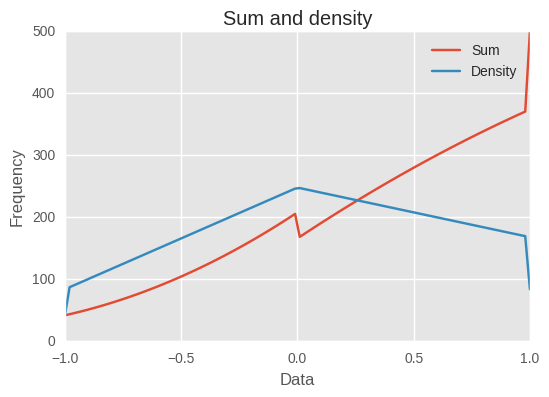

In [30]:
plt.figure()
y1 = [h1.sum(z) for z in x]
y2 = [h1.density(z) for z in x]
plt.plot(x, y1, label="Sum")
plt.plot(x, y2, label="Density")
plt.title("Sum and density")
plt.ylabel("Frequency")
plt.xlabel("Data")
plt.legend(loc="best")
plt.ylim(0, 500)
plt.show()

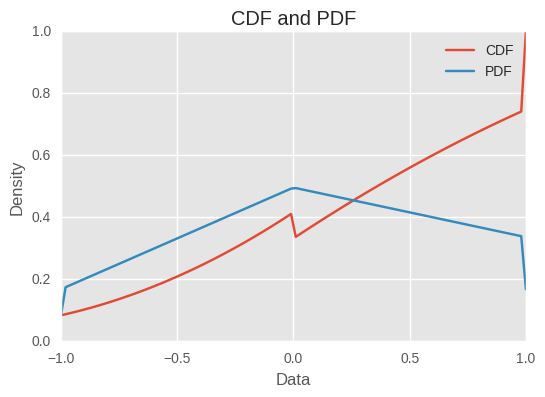

In [31]:
plt.figure()
y1 = [h1.cdf(z) for z in x]
y2 = [h1.pdf(z) for z in x]
plt.plot(x, y1, label="CDF")
plt.plot(x, y2, label="PDF")
plt.title("CDF and PDF")
plt.ylabel("Density")
plt.xlabel("Data")
plt.legend(loc="best")
plt.ylim(0, 1)
plt.show()

In [32]:
h2 = StreamHist(maxbins=3).update([1, 2, 3])
list(h2.bins)

[Bin(value=1, count=1), Bin(value=2, count=1), Bin(value=3, count=1)]

In [33]:
h2.sum(2.)

1.0

In [34]:
h2.update(0.5)
list(h2.bins)

[Bin(value=0, count=2), Bin(value=2, count=1), Bin(value=3, count=1)]

In [35]:
'''
mixed_normal_data = np.concatenate((
    np.random.normal(0.0, 0.2, 160000),
    np.random.normal(1.0, 0.2, 80000),
    np.random.normal(2.0, 0.2, 40000),
    np.random.normal(3.0, 0.2, 20000)
    ))
np.random.shuffle(mixed_normal_data)
'''

'\nmixed_normal_data = np.concatenate((\n    np.random.normal(0.0, 0.2, 160000),\n    np.random.normal(1.0, 0.2, 80000),\n    np.random.normal(2.0, 0.2, 40000),\n    np.random.normal(3.0, 0.2, 20000)\n    ))\nnp.random.shuffle(mixed_normal_data)\n'

In [36]:
h3 = StreamHist(maxbins=8).update(norm)
h4 = StreamHist(maxbins=64).update(norm)

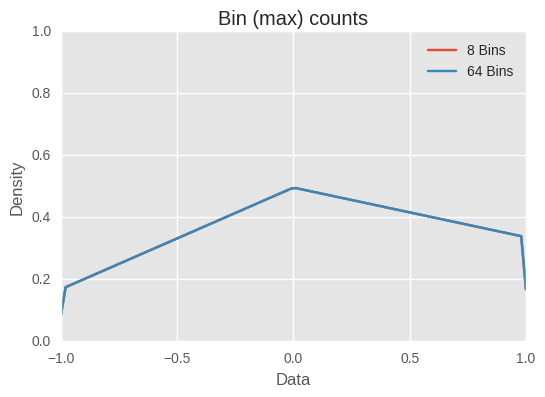

In [37]:
l, u = h4.bounds()
x = np.linspace(l, u, 100)

plt.figure()
y1 = [h3.pdf(z) for z in x]
y2 = [h4.pdf(z) for z in x]
plt.plot(x, y1, label="8 Bins")
plt.plot(x, y2, label="64 Bins")
plt.legend(loc="best")
plt.title("Bin (max) counts")
plt.ylabel("Density")
plt.xlabel("Data")
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.show()

In [38]:
h5 = StreamHist(maxbins=8, weighted=True).update(norm)
h6 = StreamHist(maxbins=8, weighted=False).update(norm)

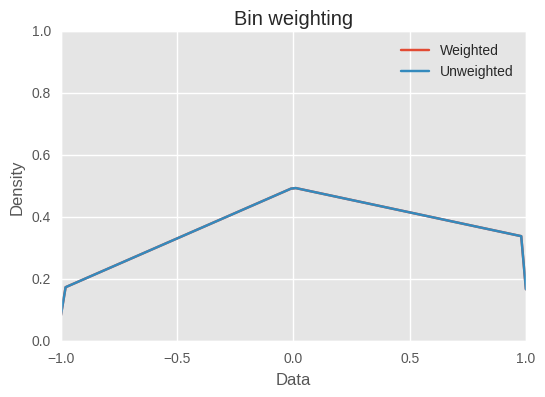

In [39]:
l, u = h5.bounds()
x = np.linspace(l, u, 100)

plt.figure()
y1 = [h5.pdf(z) for z in x]
y2 = [h6.pdf(z) for z in x]
plt.plot(x, y1, label="Weighted")
plt.plot(x, y2, label="Unweighted")
plt.legend(loc="best")
plt.title("Bin weighting")
plt.ylabel("Density")
plt.xlabel("Data")
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.show()

In [40]:
# Create 500 samples from the mixed Gaussian data
samples = np.split(norm, 500)

# Create 300 histograms from the noisy samples
# This might take a few seconds...
hists = [StreamHist().update(s) for s in samples]

# Merge the 300 histograms
h7 = sum(hists)  # How cool is that!

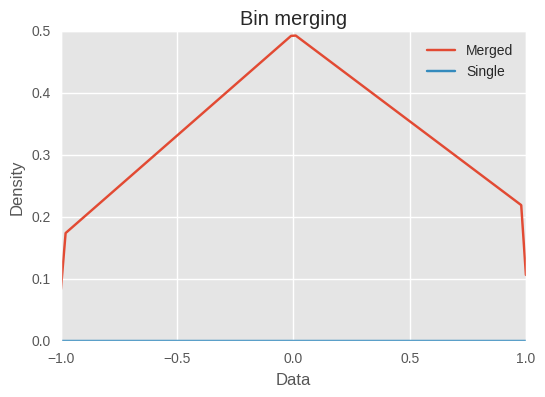

In [41]:
min, max = h7.bounds()
x = np.linspace(min, max, 100)

plt.figure()
y1 = [h7.pdf(z) for z in x]
y2 = [hists[-1].pdf(z) for z in x]
plt.plot(x, y1, label="Merged")
plt.plot(x, y2, label="Single")
plt.legend(loc="best")
plt.title("Bin merging")
plt.ylabel("Density")
plt.xlabel("Data")
plt.xlim(-1, 1)
plt.ylim(0, .5)
plt.show()

In [42]:
h8 = StreamHist().update([None, 7, None])
h8.missing_count

2

In [43]:
# This takes quite a while (~2.7s each run for the 'frozen' histogram)...
%timeit StreamHist().update(norm)
%timeit StreamHist(freeze=1024).update(norm)

10 loops, best of 3: 18.9 ms per loop
10 loops, best of 3: 14.1 ms per loop


In [44]:
from numpy import histogram, allclose
length = norm.shape[0]
bins = 25
h9 = StreamHist().update(norm)
hist1, bins1 = h9.compute_breaks(bins)
hist2, bins2 = histogram(norm, bins=bins)

if allclose(bins1, bins2):
    print("The bin breaks are all close")
if allclose(hist1, hist2, rtol=1, atol=length/(bins**2)):
    print("The bin counts are all close")

The bin breaks are all close


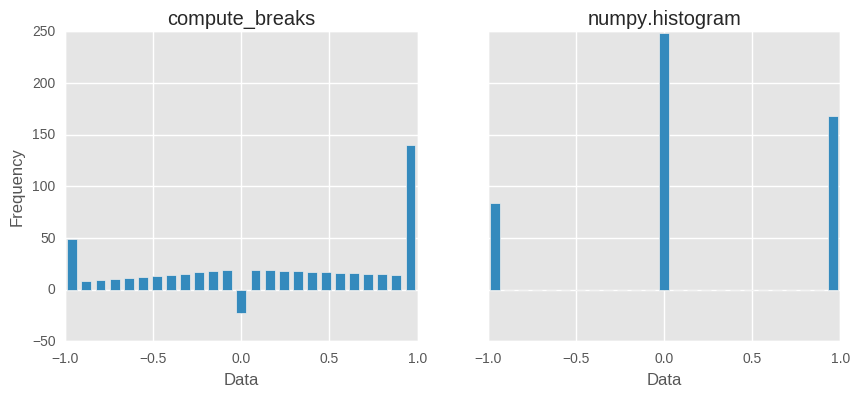

In [45]:
width = 0.7 * (bins2[1] - bins2[0])
c1 = [(a + b)/2. for a, b in zip(bins1[:-1], bins1[1:])]
c2 = [(a + b)/2. for a, b in zip(bins2[:-1], bins2[1:])]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax1.bar(c1, hist1, align='center', width=width)
ax2.bar(c2, hist2, align='center', width=width)
ax1.set_title("compute_breaks")
ax2.set_title("numpy.histogram")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Data")
ax2.set_xlabel("Data")
plt.show()

In [46]:
h9.print_breaks(bins)

-1.0	...................
-0.92	...
-0.84	...
-0.76	....
-0.68	....
-0.6	....
-0.52	.....
-0.44	.....
-0.36	......
-0.28	......
-0.2	.......
-0.12	.......
-0.04	
0.04	.......
0.12	.......
0.2	.......
0.28	.......
0.36	......
0.44	......
0.52	......
0.6	......
0.68	......
0.76	.....
0.84	.....
0.92	.......................................................



### Emoji- analysis

The polarity data was reshaped at the suggestion of the sci-kit-learn library and normalized by the function into (-1, 0, 1) categories for better emoji-analyzation. The positive bin had the most instances of tweets, however the histogram reveals that more tweets were generally neutral.

I generally conform to the suggestions of computer libraries when they tell me to adjust my data, but I think generalizing the sentiment of tweets into (-1, 0, 1) categories is somewhat limiting in analyzing people's online thoughts. So a recalculation will be initialized without a normalization using the reshaped data, operating under the assumption that the polarity was already optimized for this algorithm.

In [47]:
reshape

array([[ 0.35      ],
       [-0.12121212],
       [ 0.5       ],
       [ 0.2       ],
       [ 0.31767677],
       [-0.625     ],
       [ 0.        ],
       [ 1.        ],
       [ 0.04910714],
       [ 0.375     ],
       [ 0.        ],
       [-0.8       ],
       [ 0.        ],
       [ 0.        ],
       [ 0.35      ],
       [ 0.6       ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.75      ],
       [-0.1       ],
       [ 0.1       ],
       [-0.1       ],
       [ 0.25      ],
       [ 0.        ],
       [ 0.        ],
       [ 0.06666667],
       [ 0.        ],
       [-0.625     ],
       [ 0.38333333],
       [-0.5       ],
       [ 0.75      ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.05      ],
       [ 0.25      ],
       [ 0.        ],
       [-0.4       ],
       [ 0.        ],
       [ 0.125     ],
       [ 0.05      ],
       [ 0.8       ],
       [ 0

In [48]:
h1 = StreamHist(maxbins=32)  # Create histogram with 32 bins
h1.update(reshape)       # Add non-normalized pols

In [49]:
h1.sum(0.0)

206.85123451494778

In [50]:
h1.density(0.00)

4417.0921047090224

In [51]:
h1.describe()

{'25%': -0.021816717744683981,
 '50%': 0.010471001256423381,
 '75%': 0.16015693759655109,
 'count': 500,
 'max': 1.0,
 'mean': 0.071817207679473305,
 'min': -1.0,
 'var': 0.10553066504399042}

In [52]:
h1.quantiles(.5, .95, .99)

[0.010471001256423381, 0.73045330614861093, 1.0]

In [53]:
l, u = h1.bounds()
x = np.linspace(l, u, 100)

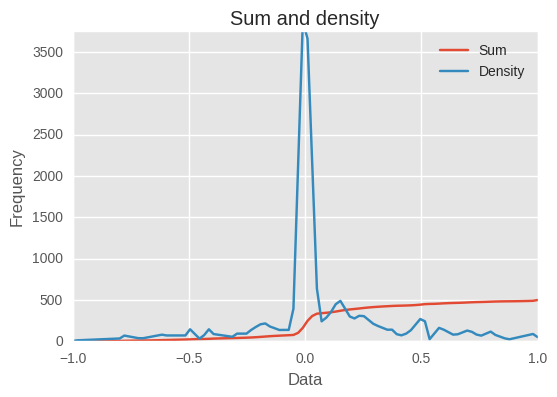

In [54]:
plt.figure()
y1 = [h1.sum(z) for z in x]
y2 = [h1.density(z) for z in x]
plt.plot(x, y1, label="Sum")
plt.plot(x, y2, label="Density")
plt.title("Sum and density")
plt.ylabel("Frequency")
plt.xlabel("Data")
plt.legend(loc="best")
plt.ylim(0, 3750)
plt.show()

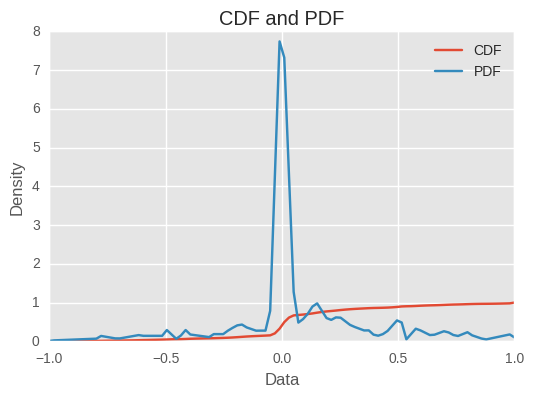

In [55]:
plt.figure()
y1 = [h1.cdf(z) for z in x]
y2 = [h1.pdf(z) for z in x]
plt.plot(x, y1, label="CDF")
plt.plot(x, y2, label="PDF")
plt.title("CDF and PDF")
plt.ylabel("Density")
plt.xlabel("Data")
plt.legend(loc="best")
plt.ylim(0, 8)
plt.show()

In [56]:
h2 = StreamHist(maxbins=3).update([1, 2, 3])
list(h2.bins)

[Bin(value=1, count=1), Bin(value=2, count=1), Bin(value=3, count=1)]

In [57]:
h2.sum(2.)

1.0

In [58]:
h2.update(0.5)
list(h2.bins)

[Bin(value=0, count=2), Bin(value=2, count=1), Bin(value=3, count=1)]

In [59]:
h3 = StreamHist(maxbins=8).update(reshape)
h4 = StreamHist(maxbins=64).update(reshape)

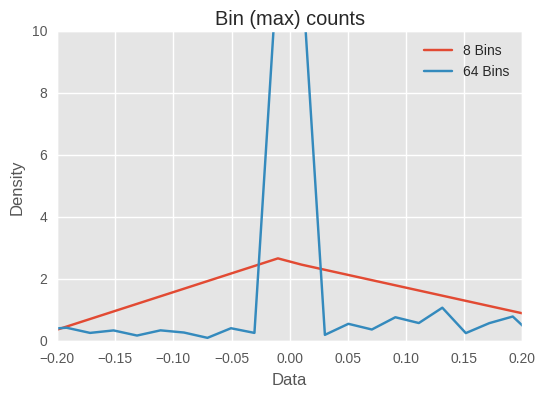

In [60]:
l, u = h4.bounds()
x = np.linspace(l, u, 100)

plt.figure()
y1 = [h3.pdf(z) for z in x]
y2 = [h4.pdf(z) for z in x]
plt.plot(x, y1, label="8 Bins")
plt.plot(x, y2, label="64 Bins")
plt.legend(loc="best")
plt.title("Bin (max) counts")
plt.ylabel("Density")
plt.xlabel("Data")
plt.xlim(-.2, .2)
plt.ylim(0, 10)
plt.show()

In [61]:
h5 = StreamHist(maxbins=8, weighted=True).update(reshape)
h6 = StreamHist(maxbins=8, weighted=False).update(reshape)

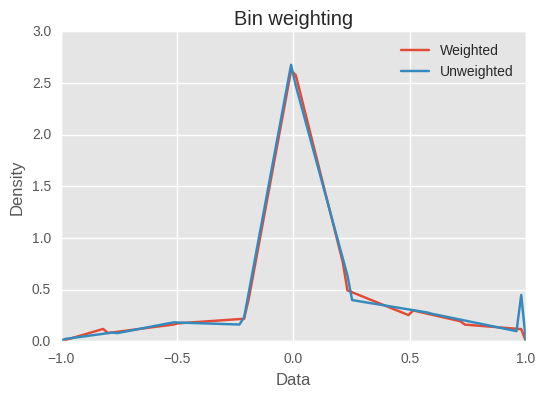

In [62]:
l, u = h5.bounds()
x = np.linspace(l, u, 100)

plt.figure()
y1 = [h5.pdf(z) for z in x]
y2 = [h6.pdf(z) for z in x]
plt.plot(x, y1, label="Weighted")
plt.plot(x, y2, label="Unweighted")
plt.legend(loc="best")
plt.title("Bin weighting")
plt.ylabel("Density")
plt.xlabel("Data")
plt.xlim(-1, 1)
plt.ylim(0, 3)
plt.show()

In [63]:
# Create 500 samples from the mixed Gaussian data
samples = np.split(reshape,1)

# Create 300 histograms from the noisy samples
# This might take a few seconds...
hists = [StreamHist().update(s) for s in samples]

# Merge the 300 histograms
h7 = sum(hists)  # How cool is that! pretty cool carson, pretty cool

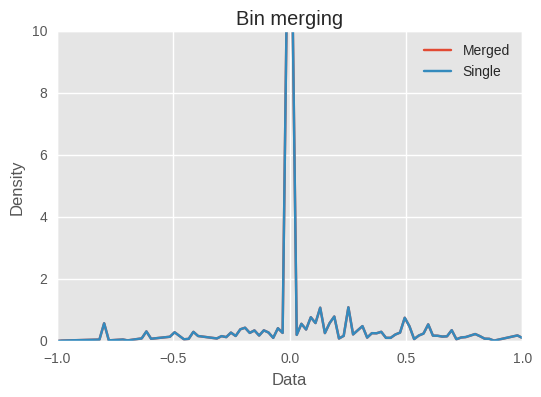

In [64]:
min, max = h7.bounds()
x = np.linspace(min, max, 100)

plt.figure()
y1 = [h7.pdf(z) for z in x]
y2 = [hists[-1].pdf(z) for z in x]
plt.plot(x, y1, label="Merged")
plt.plot(x, y2, label="Single")
plt.legend(loc="best")
plt.title("Bin merging")
plt.ylabel("Density")
plt.xlabel("Data")
plt.xlim(-1, 1)
plt.ylim(0, 10)
plt.show()

In [65]:
h8 = StreamHist().update([None, 7, None])
h8.missing_count

2

In [66]:
# This takes quite a while (~2.7s each run for the 'frozen' histogram)...
%timeit StreamHist().update(reshape)
%timeit StreamHist(freeze=1024).update(reshape)

10 loops, best of 3: 22.1 ms per loop
10 loops, best of 3: 21.5 ms per loop


In [67]:
from numpy import histogram, allclose
length = reshape.shape[0]
bins = 25
h9 = StreamHist().update(reshape)
hist1, bins1 = h9.compute_breaks(bins)
hist2, bins2 = histogram(reshape, bins=bins)

if allclose(bins1, bins2):
    print("The bin breaks are all close")
if allclose(hist1, hist2, rtol=1, atol=length/(bins**2)):
    print("The bin counts are all close")

The bin breaks are all close


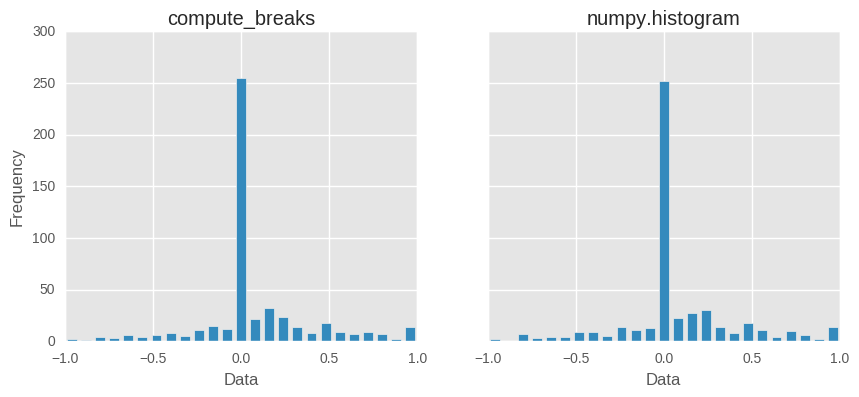

In [68]:
width = 0.7 * (bins2[1] - bins2[0])
c1 = [(a + b)/2. for a, b in zip(bins1[:-1], bins1[1:])]
c2 = [(a + b)/2. for a, b in zip(bins2[:-1], bins2[1:])]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax1.bar(c1, hist1, align='center', width=width)
ax2.bar(c2, hist2, align='center', width=width)
ax1.set_title("compute_breaks")
ax2.set_title("numpy.histogram")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Data")
ax2.set_xlabel("Data")
plt.show()

In [69]:
h9.print_breaks(bins)

-1.0	
-0.92	
-0.84	.
-0.76	.
-0.68	..
-0.6	.
-0.52	..
-0.44	...
-0.36	..
-0.28	....
-0.2	.....
-0.12	....
-0.04	.....................................................................................................
0.04	........
0.12	.............
0.2	.........
0.28	.....
0.36	...
0.44	......
0.52	...
0.6	..
0.68	...
0.76	..
0.84	.
0.92	.....



## Conclusions

It looks like the normalized data negates the influence of the neutral instances in this data while the non-normalized data includes the highly influential neutral instances. From the normalized data, it can be inferred that the stream is generally positive while the non-normalized data is generally neutral. Additionally, it can be inferred that the original polarity is based on emojis alone with no outside influence from text-based dictionary classifiers. This explains the high influence of neutral tweets on our dataset and makes for a simple linear examination.

It is difficult to discern which version of the data is a more useful representation. While removing the influence of neutral instances provides a highlight of the positive instances, it also ignores the neutral influence and provides bias for the positive category. Furthermore, rendering human emotion into three categories drawn from an already bayesic representation of thoughts confined to 140 characters is an oversimplification of the human experience. That is to say, people think they can be defined as complex and using a stream of briefly expanded thoughts, no matter how constant this stream may be, is somewhat limiting.

![member](member.jpg)

Conversely, while removing the bias of neutral thoughts provides a platform for the exposition of positive/negative thoughts, it also overlooks a wide swath of the stream. A cliché like "see the forest for the trees" or "wearing rose-colored glasses/nostalgia goggles" comes to mind when describing the Twitter phenomenon, especially when thinking about what happened this past election cycle, but that's a discussion for another time.

It is an interesting exercise to analyze how modern communication has evolved into a collection of pictures, symbols, emojicons, and snippets of text. Although this allows for faster, easier communication and mimics the brains function of thinking in colors, shapes, and edges, it also ultimately leads to a lack of any real critical thinking or depth of thought. Having to actively search through thesaurus' and dictionaries to find the correct word to describe thoughts allows time for the brain to reach conclusions that might not otherwise be easily summarized in the latest trending meme. In the same breath, who actually thinks in the inner-monologue described by TV shows like Scrubs? Isn't the inner-monologue voice over used in video just an abstraction of other mediums like books which have the freedom to describe each character's thoughts in a longwinded and concrete fashion? And aren't books an attempt to contextualize human speech? And isn't human speech an attempt to abstract away human thoughts in an effort to communicate? This might be a series of leaps in logic, but it might make sense to cut out the middle man and streamline the flow of thoughts directly from person to person.

I, for one, can't wait until the computer is directly connected to my brain to workaround the cumbersome task of typing and I ~~will~~ embrace our ~~new~~ Google overlords. As long as some sort of humanity is implemented into the technology with a system of checks, balances, and sunset laws, what could possibly go wrong?! 😀

![geologist](geologist.jpeg)

I am lorde, yayaya.

Thanks for inception-ing the idea of the singularity into my brain!